<a href="https://colab.research.google.com/github/saukrtz/Coffee-sales-analysis/blob/main/Coffee_Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = '/content/Project.csv.zip'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
df.head()


,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [25]:
# Basic information about the dataset
dataset_info = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Column Names": df.columns.tolist(),
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum()
}

dataset_info

{'Number of Rows': 149116,
 'Number of Columns': 18,
 'Column Names': ['transaction_id',
  'transaction_date',
  'transaction_time',
  'store_id',
  'store_location',
  'product_id',
  'transaction_qty',
  'unit_price',
  'Total_Bill',
  'product_category',
  'product_type',
  'product_detail',
  'Size',
  'Month Name',
  'Day Name',
  'Hour',
  'Month',
  'Day of Week'],
 'Data Types': transaction_id        int64
 transaction_date     object
 transaction_time     object
 store_id              int64
 store_location       object
 product_id            int64
 transaction_qty       int64
 unit_price          float64
 Total_Bill          float64
 product_category     object
 product_type         object
 product_detail       object
 Size                 object
 Month Name           object
 Day Name             object
 Hour                  int64
 Month                 int64
 Day of Week           int64
 dtype: object,
 'Missing Values': transaction_id      0
 transaction_date    0
 transact

In [26]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
numerical_stats

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [27]:
# Count of unique values and examples for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = {column: {'Unique Count': df[column].nunique(), 'Examples': df[column].unique()[:5]} for column in categorical_columns}

categorical_stats

{'transaction_date': {'Unique Count': 181,
  'Examples': array(['01-06-2023', '02-06-2023', '03-06-2023', '04-06-2023',
         '05-06-2023'], dtype=object)},
 'transaction_time': {'Unique Count': 25762,
  'Examples': array(['11:33:29', '11:18:24', '12:02:45', '19:39:47', '12:24:57'],
        dtype=object)},
 'store_location': {'Unique Count': 3,
  'Examples': array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)},
 'product_category': {'Unique Count': 9,
  'Examples': array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours'],
        dtype=object)},
 'product_type': {'Unique Count': 29,
  'Examples': array(['Brewed herbal tea', 'Brewed Black tea', 'Brewed Green tea',
         'Brewed Chai tea', 'Drip coffee'], dtype=object)},
 'product_detail': {'Unique Count': 45,
  'Examples': array(['Peppermint', 'Lemon Grass', 'Earl Grey', 'English Breakfast',
         'Serenity Green Tea'], dtype=object)},
 'Size': {'Unique Count': 4,
  'Examples': array(['Large', 'Regu

In [28]:
# Converting 'transaction_date' and 'transaction_time' into datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

# Checking the conversion
df[['transaction_date', 'transaction_time']].head()


,transaction_date,transaction_time
0,2023-06-01,0 days 11:33:29
1,2023-06-02,0 days 11:18:24
2,2023-06-02,0 days 12:02:45
3,2023-06-02,0 days 19:39:47
4,2023-06-03,0 days 12:24:57


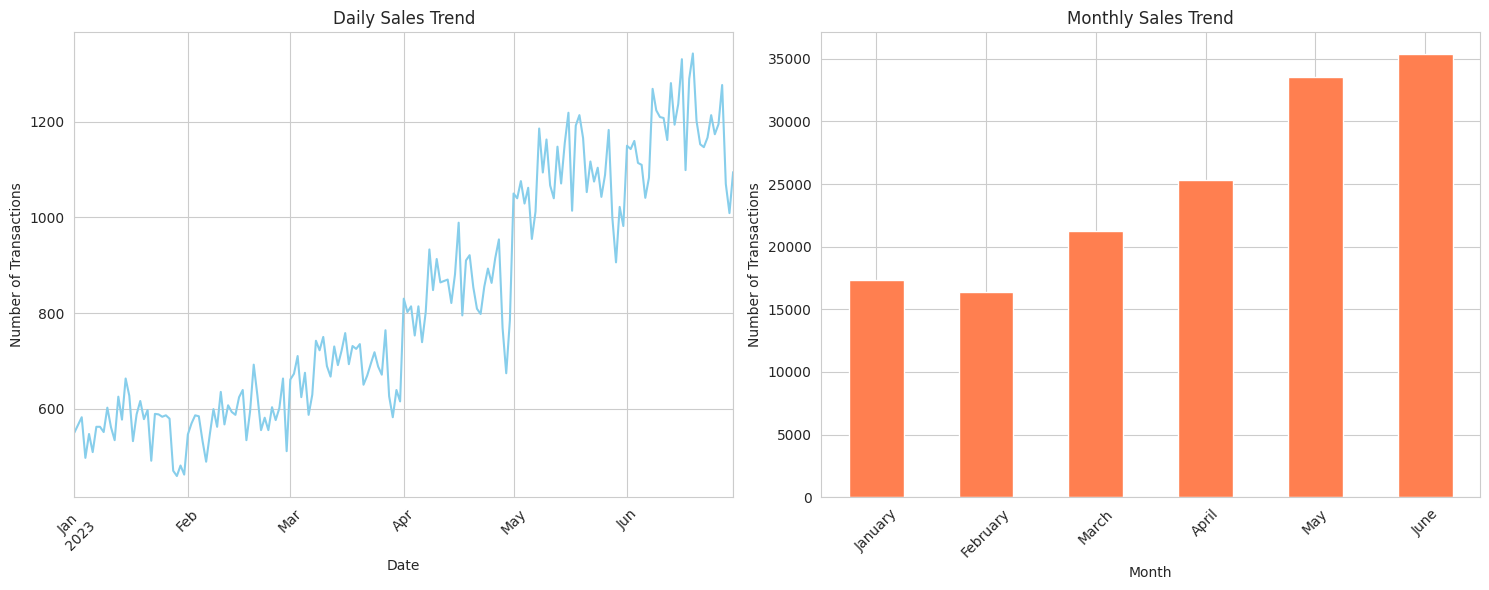

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Temporal Trends Analysis

## Daily Sales Trend
daily_sales = df.groupby(df['transaction_date']).size()

## Monthly Sales Trend
monthly_sales = df.groupby(df['Month Name']).size().reindex(['January', 'February', 'March', 'April', 'May', 'June'])

# Plotting the trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
daily_sales.plot(title='Daily Sales Trend', xlabel='Date', ylabel='Number of Transactions', color='skyblue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
monthly_sales.plot(kind='bar', title='Monthly Sales Trend', xlabel='Month', ylabel='Number of Transactions', color='coral')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

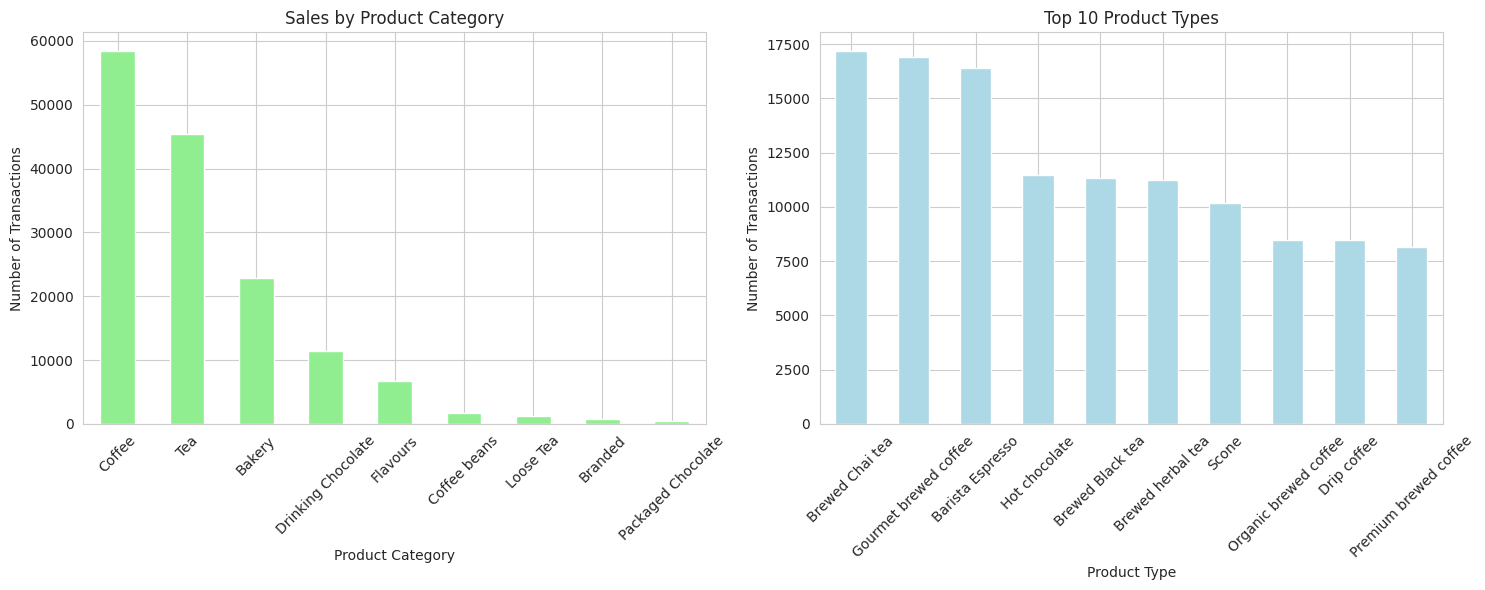

In [30]:
# Product Analysis

## Most Popular Product Categories
category_sales = df['product_category'].value_counts()

## Most Popular Product Types
type_sales = df['product_type'].value_counts()

# Plotting the product analysis
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_sales.plot(kind='bar', title='Sales by Product Category', xlabel='Product Category', ylabel='Number of Transactions', color='lightgreen')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
type_sales.head(10).plot(kind='bar', title='Top 10 Product Types', xlabel='Product Type', ylabel='Number of Transactions', color='lightblue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

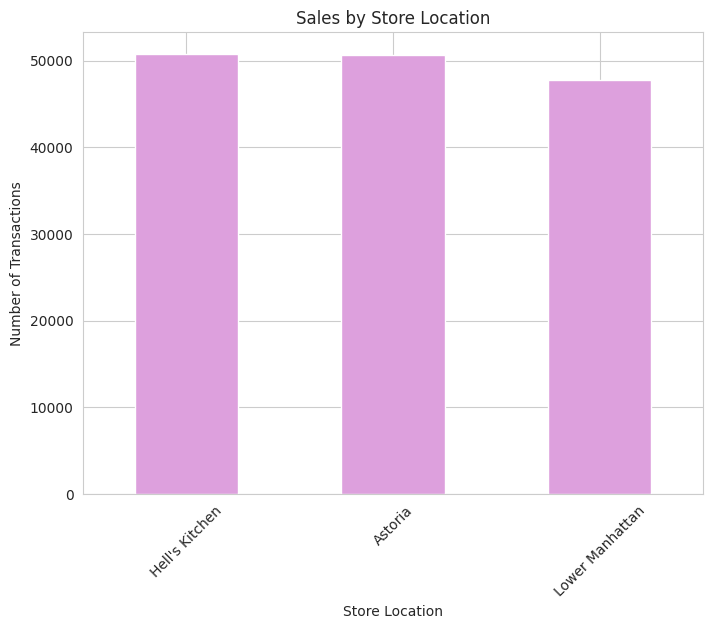

In [31]:
# Store Analysis

## Sales by Store Location
store_sales = df['store_location'].value_counts()

# Plotting store analysis
plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar', title='Sales by Store Location', xlabel='Store Location', ylabel='Number of Transactions', color='plum')
plt.xticks(rotation=45)

plt.show()

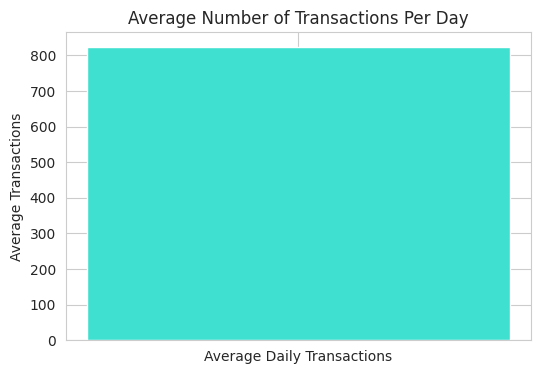

823.8453038674033

In [32]:
# Q1: Average number of transactions per day
avg_daily_transactions = daily_sales.mean()

# Creating a bar chart for average daily transactions
plt.figure(figsize=(6, 4))
plt.bar(x='Average Daily Transactions', height=avg_daily_transactions, color='turquoise')
plt.title('Average Number of Transactions Per Day')
plt.ylabel('Average Transactions')
plt.show()

# Answer for Q1
avg_daily_transactions

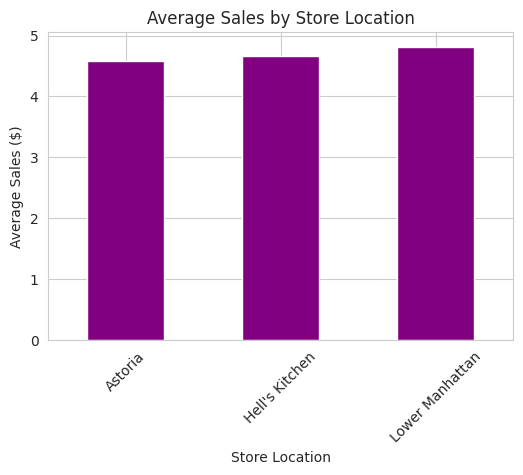

,Total_Bill
store_location,
Astoria,4.589891
Hell's Kitchen,4.661696
Lower Manhattan,4.814726


In [33]:
# Q2: Highest average sales by store location
average_sales_by_store = df.groupby('store_location')['Total_Bill'].mean()

# Creating a bar chart for average sales by store location
plt.figure(figsize=(6, 4))
average_sales_by_store.plot(kind='bar', color='purple')
plt.title('Average Sales by Store Location')
plt.ylabel('Average Sales ($)')
plt.xlabel('Store Location')
plt.xticks(rotation=45)
plt.show()

# Answer for Q2
average_sales_by_store

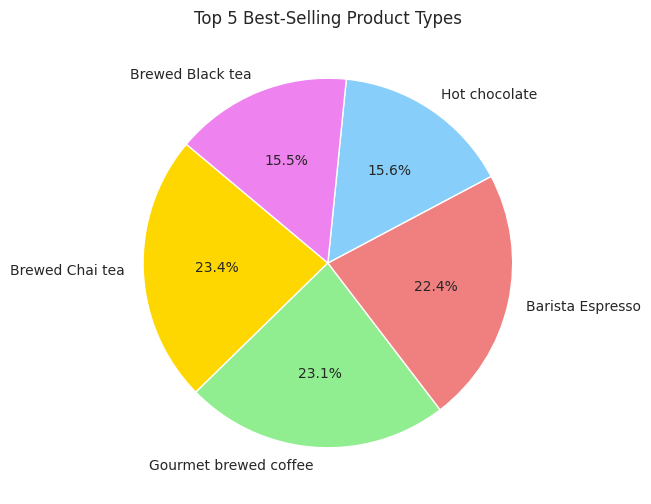

,count
product_type,
Brewed Chai tea,17183
Gourmet brewed coffee,16912
Barista Espresso,16403
Hot chocolate,11468
Brewed Black tea,11350


In [34]:
# Q3: Top 5 best-selling product types
top_5_product_types = type_sales.head(5)

# Creating a pie chart for the top 5 best-selling product types
plt.figure(figsize=(8, 6))
top_5_product_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'violet'])
plt.title('Top 5 Best-Selling Product Types')
plt.ylabel('')
plt.show()

# Answer for Q3
top_5_product_types

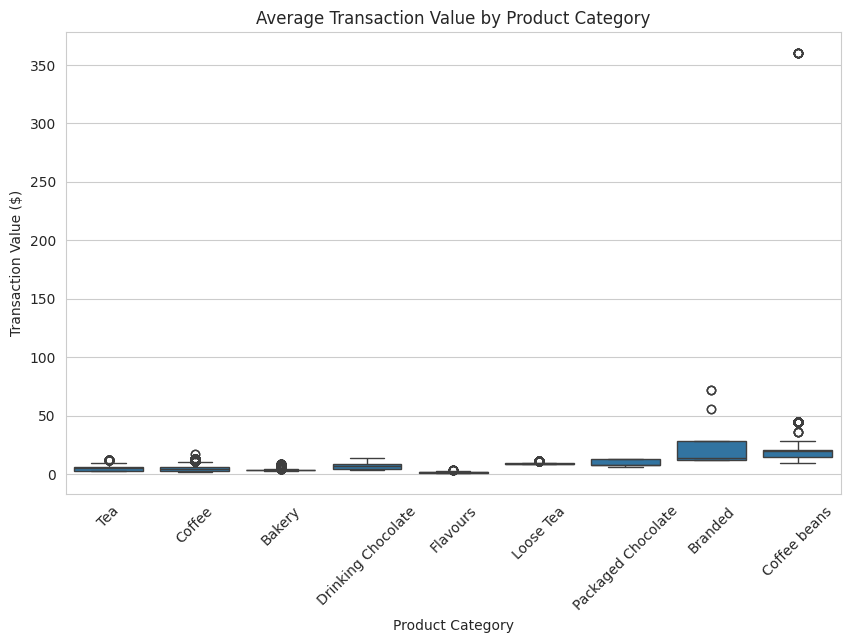

,Total_Bill
product_category,
Bakery,3.610969
Branded,18.215529
Coffee,4.621207
Coffee beans,22.866657
Drinking Chocolate,6.314615
Flavours,1.238409
Loose Tea,9.267438
Packaged Chocolate,9.050595
Tea,4.321458


In [35]:
# Q4: Average transaction value by product category
avg_transaction_value_by_category = df.groupby('product_category')['Total_Bill'].mean()

# Creating a box plot for average transaction value by product category
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category', y='Total_Bill', data=df)
plt.title('Average Transaction Value by Product Category')
plt.ylabel('Transaction Value ($)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

# Answer for Q4
avg_transaction_value_by_category

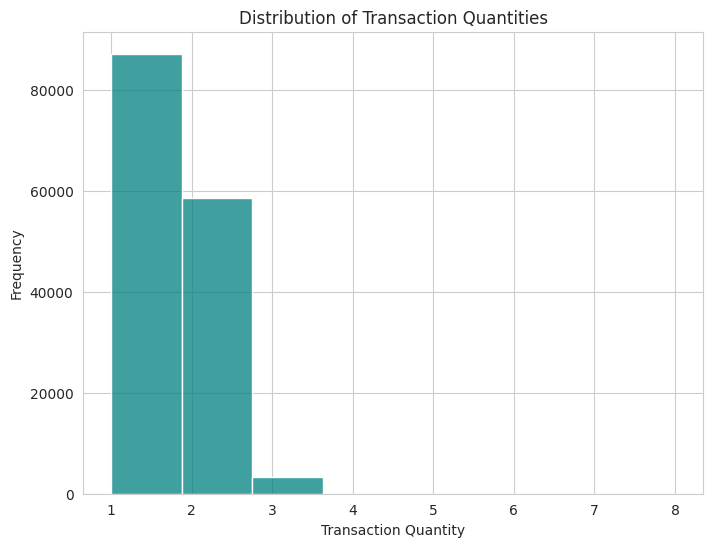

,transaction_qty
count,149116.000000
mean,1.438276
std,0.542509
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [36]:
# Q5: Distribution of transaction quantities
transaction_qty_distribution = df['transaction_qty']

# Creating a histogram for the distribution of transaction quantities
plt.figure(figsize=(8, 6))
sns.histplot(transaction_qty_distribution, bins=8, color='teal')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

# Answer for Q5
transaction_qty_distribution.describe()

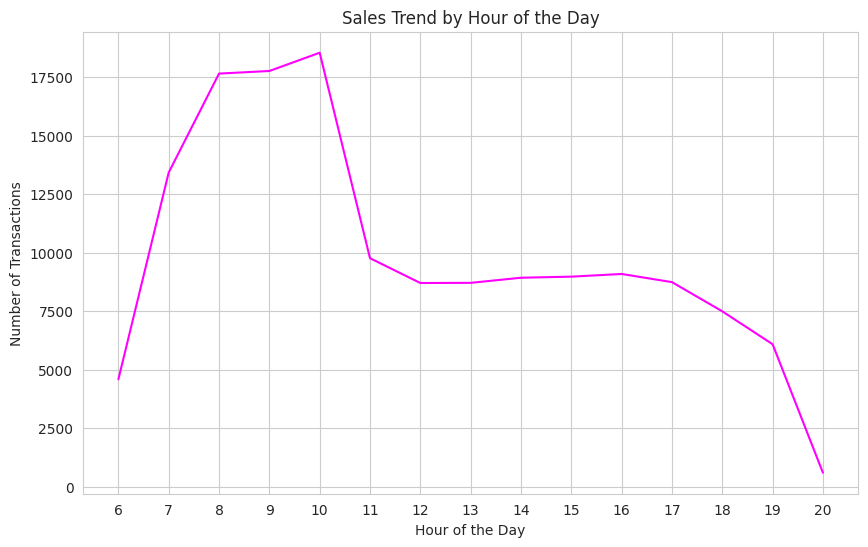

,0
Hour,
6,4594
7,13428
8,17654
9,17764
10,18545
11,9766
12,8708
13,8714
14,8933


In [37]:
# Q6: Peak hours for sales
sales_by_hour = df.groupby('Hour').size()

# Creating a line graph for sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', color='magenta')
plt.title('Sales Trend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(6, 21))
plt.grid(True)
plt.show()

# Answer for Q6
sales_by_hour

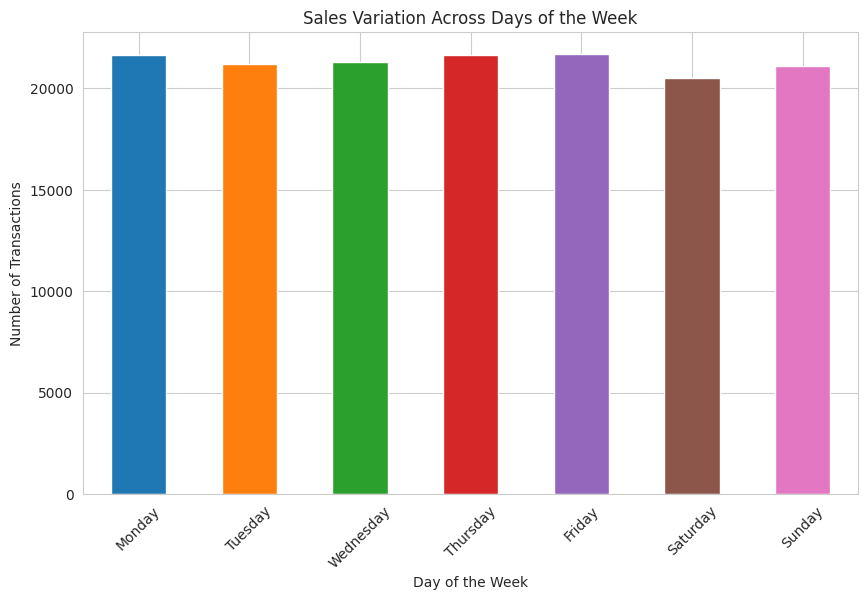

,0
Day Name,
Monday,21643
Tuesday,21202
Wednesday,21310
Thursday,21654
Friday,21701
Saturday,20510
Sunday,21096


In [38]:
# Q7: Sales variation across days of the week
sales_by_day_of_week = df.groupby('Day Name').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Creating a list of unique colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Creating a bar chart for sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', color=colors)
plt.title('Sales Variation Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Answer for Q7
sales_by_day_of_week

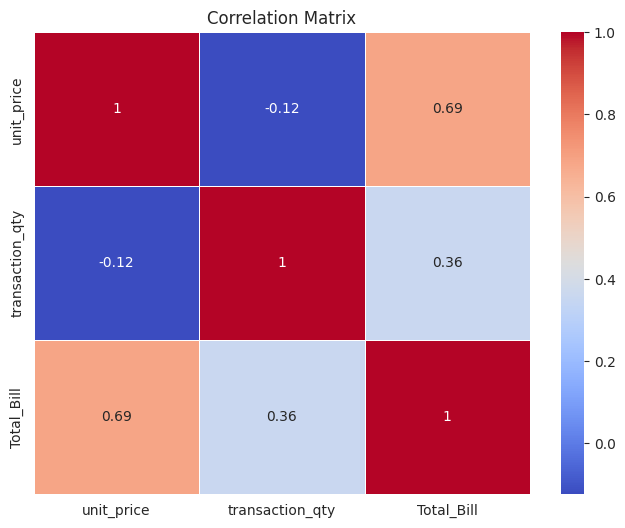

,unit_price,transaction_qty,Total_Bill
unit_price,1.000000,-0.123546,0.685550
transaction_qty,-0.123546,1.000000,0.356231
Total_Bill,0.685550,0.356231,1.000000


In [39]:
# Q8: Correlations between unit price, transaction quantity, and total bill
correlation_data = df[['unit_price', 'transaction_qty', 'Total_Bill']]
correlation_matrix = correlation_data.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Answer for Q8
correlation_matrix

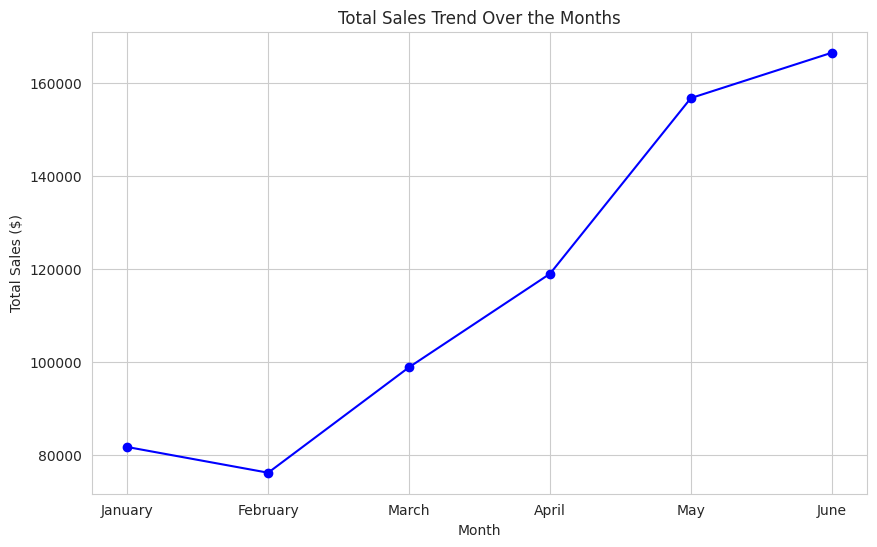

,Total_Bill
Month Name,
January,81677.74
February,76145.19
March,98834.68
April,118941.08
May,156727.76
June,166485.88


In [40]:
# Q9: Total sales trend over the months
total_sales_by_month = df.groupby('Month Name')['Total_Bill'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June'])

# Creating a line graph for total sales by month
plt.figure(figsize=(10, 6))
total_sales_by_month.plot(kind='line', marker='o', color='blue')
plt.title('Total Sales Trend Over the Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(6), ['January', 'February', 'March', 'April', 'May', 'June'])
plt.grid(True)
plt.show()

# Answer for Q9
total_sales_by_month

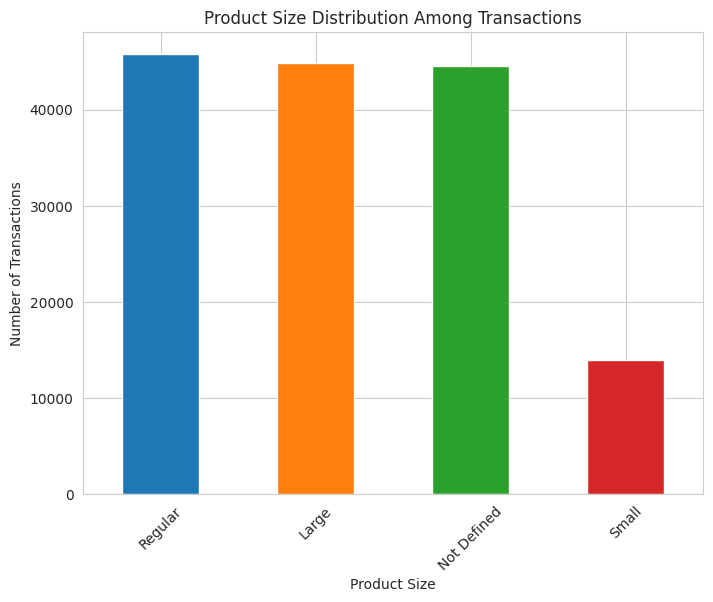

,count
Size,
Regular,45789
Large,44885
Not Defined,44518
Small,13924


In [41]:
# Q10: Product size distribution among transactions
size_distribution = df['Size'].value_counts()

# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Creating a bar chart for product size distribution
plt.figure(figsize=(8, 6))
size_distribution.plot(kind='bar', color=colors)
plt.title('Product Size Distribution Among Transactions')
plt.xlabel('Product Size')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Answer for Q10
size_distribution

In [42]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Data Preprocessing

# Selecting features and the target variable
features = ['store_location', 'product_category', 'product_type', 'Size', 'Hour', 'Day of Week', 'transaction_qty', 'unit_price']
X = df[features]
y = df['Total_Bill']

# One-hot encoding for categorical variables
categorical_features = ['store_location', 'product_category', 'product_type', 'Size']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standardizing numerical variables
numerical_features = ['Hour', 'Day of Week', 'transaction_qty', 'unit_price']
numerical_transformer = StandardScaler()

# Creating a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Splitting the Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying preprocessing to the feature set
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Checking the shape of the transformed features
X_train.shape, X_test.shape


((119292, 49), (29824, 49))

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 4: Selecting the Model - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)

# Step 5: Training the Model
rf_model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(2.3303379830521047e-05, 9.979379023605166e-06, 0.9999994490551949)